In [12]:
from micro_sleep.config_loader import load_config
import cv2 as cv
from micro_sleep.dao import State, Estimator, Activity
from micro_sleep.ml import ActivityModel
import os
from sklearn.base import TransformerMixin

from micro_sleep.detector import ActivityDetector
import joblib
import matplotlib.pyplot as plt


In [10]:
activity_model = joblib.load("/Users/raviguntur/Nautilus/DroneV/MicroSleep/models/activity_model.jlib")

eye_score = list(map(lambda x: x.eye_score, activity_model.get_event_list()))
mouth_score = list(map(lambda x: x.mouth_score, activity_model.get_event_list()))

eye_prob, mouth_prob = activity_model.predict(activity_model.get_event_list())

eye_dist = sorted(list(zip(eye_prob, eye_score)), key=lambda x: x[1])
mouth_dist = sorted(list(zip(mouth_prob, mouth_score)), key=lambda x: x[1])


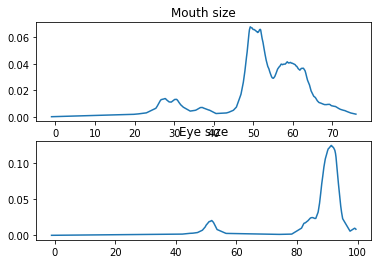

In [13]:
fig, ax = plt.subplots(2, 1)
ax[0].plot(list(map(lambda x: x[1], mouth_dist)), list(map(lambda x: x[0], mouth_dist)))
ax[0].set_title("Mouth size")
ax[1].plot(list(map(lambda x: x[1], eye_dist)), list(map(lambda x: x[0], eye_dist)))
ax[1].set_title("Eye size")
plt.show()